In [ ]:
# from pinder.core import get_pinder_location

# get_pinder_location()

In [1]:
from pinder.core import get_index

index = get_index()

In [2]:
val_set = index.query("split == 'val'").reset_index(drop=True)
test_set = index.query("split == 'test'").reset_index(drop=True)

In [3]:
test_set.groupby("split").count().id

/tmp/ipykernel_2238130/2919906308.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  test_set.groupby("split").count().id


split
test       1955
val           0
train         0
invalid       0
Name: id, dtype: int64

In [4]:
test_set[
    [
        "split",
        "id",
        "pdb_id",
        "cluster_id",
        "cluster_id_R",
        "cluster_id_L",
        "uniprot_R",
        "uniprot_L",
        "holo_R_pdb",
        "holo_L_pdb",
        "chain_R",
        "chain_L",
    ]
]  # .to_csv("./data/pinder_test_systems.csv", index=False)

,split,id,pdb_id,cluster_id,cluster_id_R,cluster_id_L,uniprot_R,uniprot_L,holo_R_pdb,holo_L_pdb,chain_R,chain_L
0,test,7rzb__A1_A0A229LVN5--7rzb__A2_A0A229LVN5,7rzb,cluster_16129_16129,cluster_16129,cluster_16129,A0A229LVN5,A0A229LVN5,7rzb__A1_A0A229LVN5-R.pdb,7rzb__A2_A0A229LVN5-L.pdb,A1,A2
1,test,3t2l__A1_Q5LE95--3t2l__A2_Q5LE95,3t2l,cluster_30933_30933,cluster_30933,cluster_30933,Q5LE95,Q5LE95,3t2l__A1_Q5LE95-R.pdb,3t2l__A2_Q5LE95-L.pdb,A1,A2
2,test,6ikj__A1_Q9I4L6--6ikj__B1_Q9I4L6,6ikj,cluster_1924_1924,cluster_1924,cluster_1924,Q9I4L6,Q9I4L6,6ikj__A1_Q9I4L6-R.pdb,6ikj__B1_Q9I4L6-L.pdb,A1,B1
3,test,8iyi__A1_Q6CVU4--8iyi__B1_Q6CVU4,8iyi,cluster_142_142,cluster_142,cluster_142,Q6CVU4,Q6CVU4,8iyi__A1_Q6CVU4-R.pdb,8iyi__B1_Q6CVU4-L.pdb,A1,B1
4,test,3uws__B1_A7A9N3--3uws__A1_A7A9N3,3uws,cluster_21030_21031,cluster_21030,cluster_21031,A7A9N3,A7A9N3,3uws__B1_A7A9N3-R.pdb,3uws__A1_A7A9N3-L.pdb,B1,A1
...,...,...,...,...,...,...,...,...,...,...,...,...
1950,test,1v57__A1_P77202--1v57__A2_P77202,1v57,cluster_14516_14516,cluster_14516,cluster_14516,P77202,P77202,1v57__A1_P77202-R.pdb,1v57__A2_P77202-L.pdb,A1,A2
1951,test,3npi__A1_Q6NFU8--3npi__B1_Q6NFU8,3npi,cluster_11166_11166,cluster_11166,cluster_11166,Q6NFU8,Q6NFU8,3npi__A1_Q6NFU8-R.pdb,3npi__B1_Q6NFU8-L.pdb,A1,B1
1952,test,8hci__B1_A0A8T8BZJ9--8hci__A1_A0A8T8BZN3,8hci,cluster_19469_19470,cluster_19469,cluster_19470,A0A8T8BZJ9,A0A8T8BZN3,8hci__B1_A0A8T8BZJ9-R.pdb,8hci__A1_A0A8T8BZN3-L.pdb,B1,A1
1953,test,8gb1__A1_Q9Y3Z3--8gb1__B1_Q9Y3Z3,8gb1,cluster_3823_3823,cluster_3823,cluster_3823,Q9Y3Z3,Q9Y3Z3,8gb1__A1_Q9Y3Z3-R.pdb,8gb1__B1_Q9Y3Z3-L.pdb,A1,B1


In [5]:
# Take about 10 mins

# import dill
# from pinder.core import get_systems

# local_paths = {}
# for system in get_systems(list(val_set.id)):
#     local_paths[system.entry.id] = system.filepaths


# with open("./data/pinder_val_local_paths.pkl", "wb") as f:
#     dill.dump(local_paths, f)

In [6]:
# Take about 10 mins

# import dill
# from pinder.core import get_systems

# local_paths = {}
# for system in get_systems(list(test_set.id)):
#     local_paths[system.entry.id] = system.filepaths


# with open("./data/pinder_test_local_paths.pkl", "wb") as f:
#     dill.dump(local_paths, f)

In [7]:
import dill

with open("./data/pinder_val_local_paths.pkl", "rb") as f:
    val_local_paths = dill.load(f)

with open("./data/pinder_test_local_paths.pkl", "rb") as f:
    test_local_paths = dill.load(f)

In [20]:
import os
import warnings

import prolif as plf
from tqdm import tqdm

warnings.filterwarnings("ignore")


dfs = []
fps = []
dfs_i = []
fps_i = []
i = 0
df_index_map = {}

for idx in tqdm(test_set.index):
    # Load explicit fingerprint
    if not os.path.exists(f"./pinder_test/explicit/fp_{idx}.pkl"):  # noqa: PTH110
        print(f"Explicit fingerprint for index {idx} not found, skipping.")  # noqa: T201
        continue
    if not os.path.exists(f"./pinder_test/implicit/fp_{idx}.pkl"):  # noqa: PTH110
        print(f"Implicit fingerprint for index {idx} not found, skipping.")  # noqa: T201
        continue
    fp = plf.Fingerprint.from_pickle(f"./pinder_test/explicit/fp_{idx}.pkl")
    df = fp.to_dataframe().T
    dfs.append(df)
    fps.append(fp)

    # Load implicit fingerprint
    fp = plf.Fingerprint.from_pickle(f"./pinder_test/implicit/fp_{idx}.pkl")
    df = fp.to_dataframe().T
    dfs_i.append(df)
    fps_i.append(fp)
    df_index_map[i] = idx
    i += 1

    if idx == 2000:
        break

  4%|▎         | 73/1955 [00:00<00:07, 245.03it/s]

Explicit fingerprint for index 22 not found, skipping.
Explicit fingerprint for index 50 not found, skipping.


  6%|▋         | 126/1955 [00:00<00:07, 243.03it/s]

Explicit fingerprint for index 80 not found, skipping.
Explicit fingerprint for index 88 not found, skipping.
Explicit fingerprint for index 98 not found, skipping.


 10%|█         | 202/1955 [00:00<00:07, 243.43it/s]

Explicit fingerprint for index 161 not found, skipping.
Explicit fingerprint for index 195 not found, skipping.
Explicit fingerprint for index 199 not found, skipping.


 13%|█▎        | 254/1955 [00:01<00:06, 250.04it/s]

Explicit fingerprint for index 220 not found, skipping.
Explicit fingerprint for index 222 not found, skipping.
Explicit fingerprint for index 227 not found, skipping.
Explicit fingerprint for index 231 not found, skipping.
Explicit fingerprint for index 270 not found, skipping.


 17%|█▋        | 332/1955 [00:01<00:06, 252.62it/s]

Explicit fingerprint for index 293 not found, skipping.
Explicit fingerprint for index 311 not found, skipping.
Explicit fingerprint for index 338 not found, skipping.


 21%|██        | 410/1955 [00:01<00:06, 253.01it/s]

Explicit fingerprint for index 378 not found, skipping.
Explicit fingerprint for index 427 not found, skipping.


 25%|██▍       | 488/1955 [00:01<00:05, 245.63it/s]

Explicit fingerprint for index 453 not found, skipping.


 29%|██▉       | 565/1955 [00:02<00:05, 246.88it/s]

Explicit fingerprint for index 519 not found, skipping.
Implicit fingerprint for index 567 not found, skipping.


 30%|███       | 590/1955 [00:02<00:05, 236.89it/s]

Explicit fingerprint for index 573 not found, skipping.


 34%|███▍      | 663/1955 [00:03<00:08, 157.13it/s]

Explicit fingerprint for index 634 not found, skipping.


 37%|███▋      | 714/1955 [00:03<00:06, 195.24it/s]

Explicit fingerprint for index 685 not found, skipping.
Explicit fingerprint for index 710 not found, skipping.
Explicit fingerprint for index 711 not found, skipping.
Explicit fingerprint for index 714 not found, skipping.
Explicit fingerprint for index 727 not found, skipping.


 47%|████▋     | 917/1955 [00:04<00:04, 241.86it/s]

Explicit fingerprint for index 887 not found, skipping.
Explicit fingerprint for index 897 not found, skipping.


 52%|█████▏    | 1020/1955 [00:04<00:04, 189.08it/s]

Explicit fingerprint for index 970 not found, skipping.
Explicit fingerprint for index 989 not found, skipping.
Explicit fingerprint for index 990 not found, skipping.


 55%|█████▍    | 1073/1955 [00:05<00:03, 220.82it/s]

Explicit fingerprint for index 1031 not found, skipping.
Explicit fingerprint for index 1047 not found, skipping.
Implicit fingerprint for index 1055 not found, skipping.
Explicit fingerprint for index 1063 not found, skipping.


 57%|█████▋    | 1124/1955 [00:05<00:03, 234.11it/s]

Explicit fingerprint for index 1088 not found, skipping.
Explicit fingerprint for index 1110 not found, skipping.
Explicit fingerprint for index 1130 not found, skipping.
Explicit fingerprint for index 1131 not found, skipping.


 61%|██████▏   | 1199/1955 [00:05<00:03, 232.96it/s]

Explicit fingerprint for index 1162 not found, skipping.
Explicit fingerprint for index 1184 not found, skipping.
Explicit fingerprint for index 1187 not found, skipping.
Explicit fingerprint for index 1191 not found, skipping.
Explicit fingerprint for index 1201 not found, skipping.


 64%|██████▍   | 1253/1955 [00:05<00:02, 250.26it/s]

Explicit fingerprint for index 1212 not found, skipping.
Explicit fingerprint for index 1228 not found, skipping.


 67%|██████▋   | 1304/1955 [00:06<00:02, 239.58it/s]

Explicit fingerprint for index 1275 not found, skipping.
Explicit fingerprint for index 1298 not found, skipping.


 72%|███████▏  | 1402/1955 [00:06<00:03, 172.32it/s]

Explicit fingerprint for index 1358 not found, skipping.
Explicit fingerprint for index 1359 not found, skipping.


 74%|███████▍  | 1449/1955 [00:07<00:02, 197.11it/s]

Explicit fingerprint for index 1408 not found, skipping.
Explicit fingerprint for index 1429 not found, skipping.


 77%|███████▋  | 1501/1955 [00:07<00:02, 221.83it/s]

Explicit fingerprint for index 1463 not found, skipping.
Explicit fingerprint for index 1472 not found, skipping.
Explicit fingerprint for index 1492 not found, skipping.


 81%|████████  | 1578/1955 [00:07<00:01, 240.59it/s]

Explicit fingerprint for index 1545 not found, skipping.
Explicit fingerprint for index 1549 not found, skipping.


 91%|█████████ | 1783/1955 [00:08<00:00, 247.36it/s]

Explicit fingerprint for index 1763 not found, skipping.


 94%|█████████▍| 1834/1955 [00:09<00:00, 125.23it/s]

Explicit fingerprint for index 1785 not found, skipping.
Explicit fingerprint for index 1794 not found, skipping.
Explicit fingerprint for index 1816 not found, skipping.


 96%|█████████▋| 1885/1955 [00:09<00:00, 168.22it/s]

Implicit fingerprint for index 1853 not found, skipping.
Explicit fingerprint for index 1882 not found, skipping.
Explicit fingerprint for index 1885 not found, skipping.
Explicit fingerprint for index 1895 not found, skipping.
Explicit fingerprint for index 1900 not found, skipping.


100%|██████████| 1955/1955 [00:09<00:00, 205.38it/s]

Explicit fingerprint for index 1913 not found, skipping.


In [21]:
len(dfs)

1886

In [22]:
import numpy as np
from utils.metrics import (
    get_interactions,
    positive_predictive_value,
    sensitivity,
    tanimoto_coefficient,
)
from utils.postprocess import get_metadata_from_implicit_hbond_using_set

# idx = 5
all_aaa_dev_list = []
all_daa_dev_list = []
all_dpa_list = []
all_apa_list = []
all_vhp_list = []

all_fp_aaa_dev_list = []
all_fp_daa_dev_list = []
all_fp_dpa_list = []
all_fp_apa_list = []
all_fp_avp_list = []
all_fp_vhp_list = []

tm_coefs = []
ppvs = []
sensitivities = []

for idx in range(len(dfs_i)):
    # Get the explicit interaction's implicit metadata
    explicit_set = get_interactions(dfs[idx])

    aaa_dev_list, daa_dev_list, dpa_list, apa_list, vina_hbond_potential_list = (
        get_metadata_from_implicit_hbond_using_set(explicit_set, fps_i[idx])
    )
    all_aaa_dev_list.extend(aaa_dev_list)
    all_daa_dev_list.extend(daa_dev_list)
    all_dpa_list.extend(dpa_list)
    all_apa_list.extend(apa_list)
    all_vhp_list.extend(vina_hbond_potential_list)

    # Get the false positive interaction's implicit metadata
    implicit_set = get_interactions(dfs_i[idx])
    false_positive_set = implicit_set - explicit_set
    false_negative_set = explicit_set - implicit_set
    fp_aaa_dev_list, fp_daa_dev_list, fp_dpa_list, fp_apa_list, fp_vhp_list = (
        get_metadata_from_implicit_hbond_using_set(false_positive_set, fps_i[idx])
    )
    all_fp_aaa_dev_list.extend(fp_aaa_dev_list)
    all_fp_daa_dev_list.extend(fp_daa_dev_list)
    all_fp_dpa_list.extend(fp_dpa_list)
    all_fp_apa_list.extend(fp_apa_list)
    all_fp_vhp_list.extend(fp_vhp_list)

    # Calculate Tanimoto coefficient
    tm_coef = tanimoto_coefficient(explicit_set, implicit_set)
    tm_coefs.append(tm_coef)
    ppv = positive_predictive_value(explicit_set, implicit_set)
    ppvs.append(ppv)
    sens = sensitivity(explicit_set, implicit_set)
    sensitivities.append(sens)


print("Tanimoto coefficients:", np.mean(tm_coefs))  # noqa: T201
print("Positive Predictive Values:", np.mean(ppvs))  # noqa: T201
print("Sensitivities:", np.mean(sensitivities))  # noqa: T201

Tanimoto coefficients: 0.7943773420318236
Positive Predictive Values: 0.8348521410358152
Sensitivities: 0.940983278704799


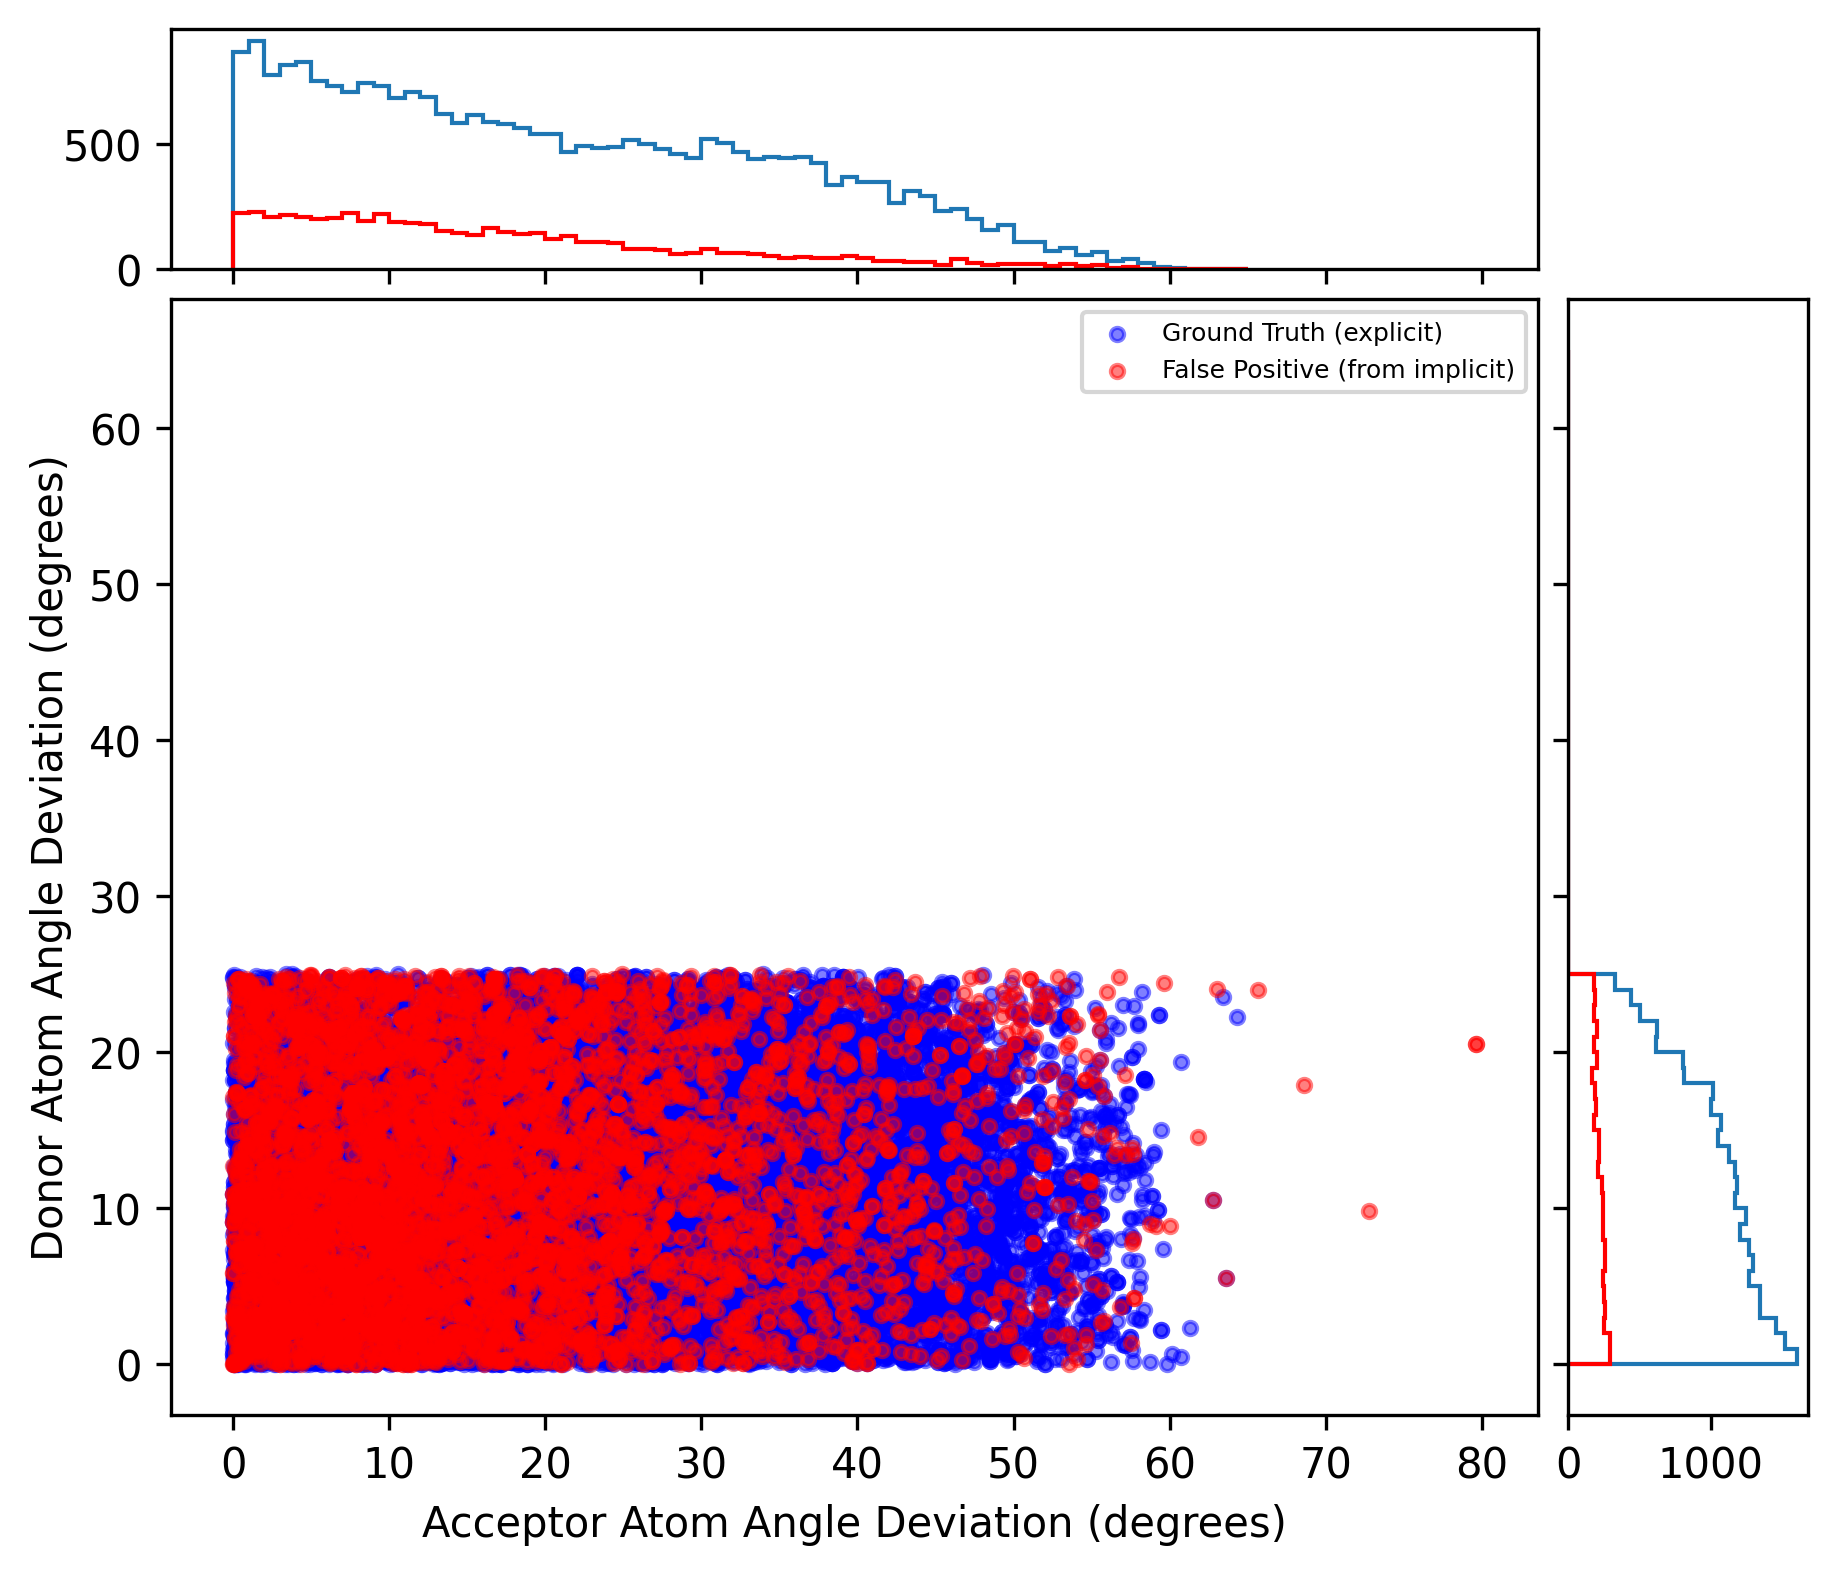

In [23]:
import matplotlib.pyplot as plt
import numpy as np
from mpl_toolkits.axes_grid1 import make_axes_locatable

fig, ax = plt.subplots(dpi=300, figsize=(8, 6))
ax.scatter(all_aaa_dev_list, all_daa_dev_list, s=10, alpha=0.5, c="blue")
ax.scatter(all_fp_aaa_dev_list, all_fp_daa_dev_list, s=10, alpha=0.5, c="red")


# the scatter plot:
# Set aspect of the main Axes.
ax.set_aspect(1.0)

# create new Axes on the right and on the top of the current Axes
divider = make_axes_locatable(ax)
# below height and pad are in inches
ax_histx = divider.append_axes("top", 0.8, pad=0.1, sharex=ax)
ax_histy = divider.append_axes("right", 0.8, pad=0.1, sharey=ax)

# make some labels invisible
ax_histx.xaxis.set_tick_params(labelbottom=False)
ax_histy.yaxis.set_tick_params(labelleft=False)

# now determine nice limits by hand:
binwidth = 1
xymax = max(np.max(np.abs(all_aaa_dev_list)), np.max(np.abs(all_daa_dev_list)))
lim = (int(xymax / binwidth) + 1) * binwidth

bins = np.arange(0, lim + binwidth, binwidth)
ax_histx.hist(all_aaa_dev_list, bins=bins, histtype="step")
ax_histx.hist(all_fp_aaa_dev_list, bins=bins, histtype="step", color="red")
ax_histy.hist(all_daa_dev_list, bins=bins, histtype="step", orientation="horizontal")
ax_histy.hist(
    all_fp_daa_dev_list,
    bins=bins,
    orientation="horizontal",
    histtype="step",
    color="red",
)

# the xaxis of ax_histx and yaxis of ax_histy are shared with ax,
# thus there is no need to manually adjust the xlim and ylim of these
# axis.

# ax_histx.set_yticks([0, 50, 100])
# ax_histy.set_xticks([0, 50, 100])

ax.set_xlabel("Acceptor Atom Angle Deviation (degrees)")
ax.set_ylabel("Donor Atom Angle Deviation (degrees)")
ax.legend(
    ["Ground Truth (explicit)", "False Positive (from implicit)"],
    loc="upper right",
    fontsize=6,
)
fig.show()

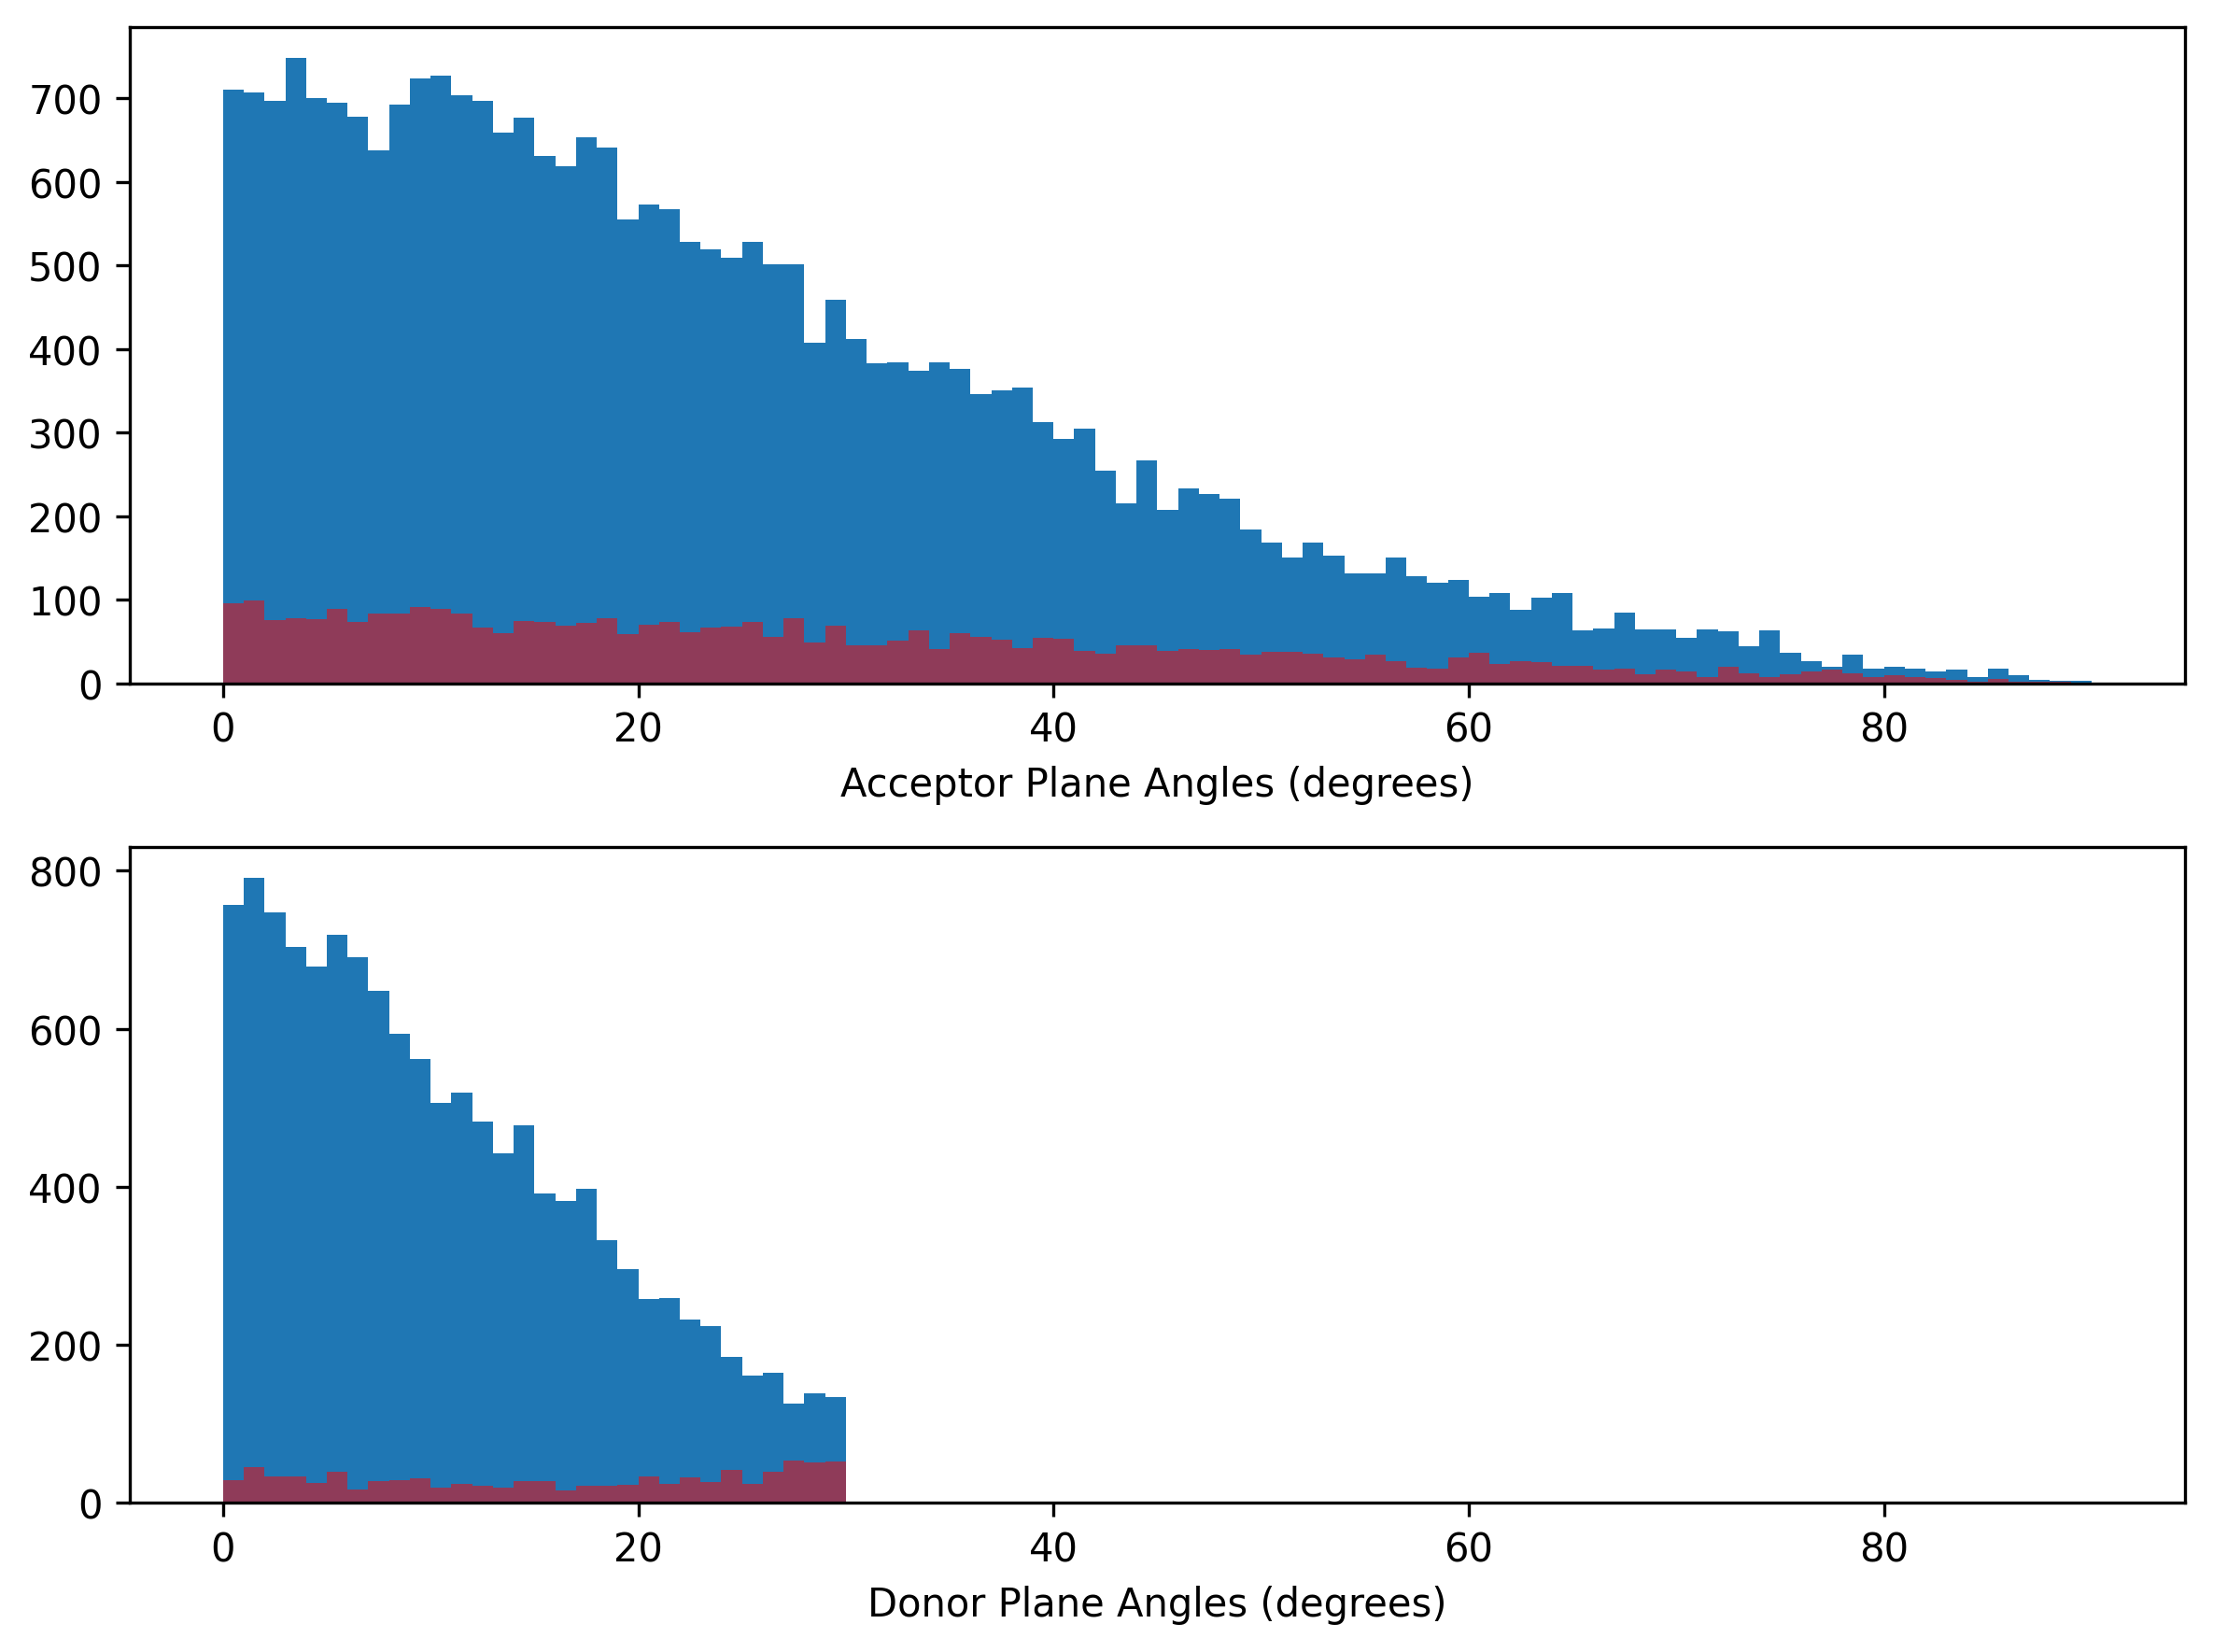

In [24]:
import matplotlib.pyplot as plt
import numpy as np
from mpl_toolkits.axes_grid1 import make_axes_locatable

fig, ax = plt.subplots(2, 1, dpi=300, figsize=(8, 6))

# now determine nice limits by hand:
binwidth = 1
xymax = max(
    np.max(np.abs(all_apa_list)),
    np.max(np.abs(all_dpa_list)),
    np.max(np.abs(all_fp_apa_list)),
    np.max(np.abs(all_fp_dpa_list)),
)
lim = (int(xymax / binwidth) + 1) * binwidth

bins = np.arange(0, lim + binwidth, binwidth)
ax[0].hist(all_apa_list, bins=bins)
ax[0].hist(all_fp_apa_list, bins=bins, alpha=0.5, color="red")
ax[1].hist(all_dpa_list, bins=bins)
ax[1].hist(all_fp_dpa_list, bins=bins, alpha=0.5, color="red")

ax[0].set_xlabel("Acceptor Plane Angles (degrees)")
ax[1].set_xlabel("Donor Plane Angles (degrees)")
fig.tight_layout()
fig.show()

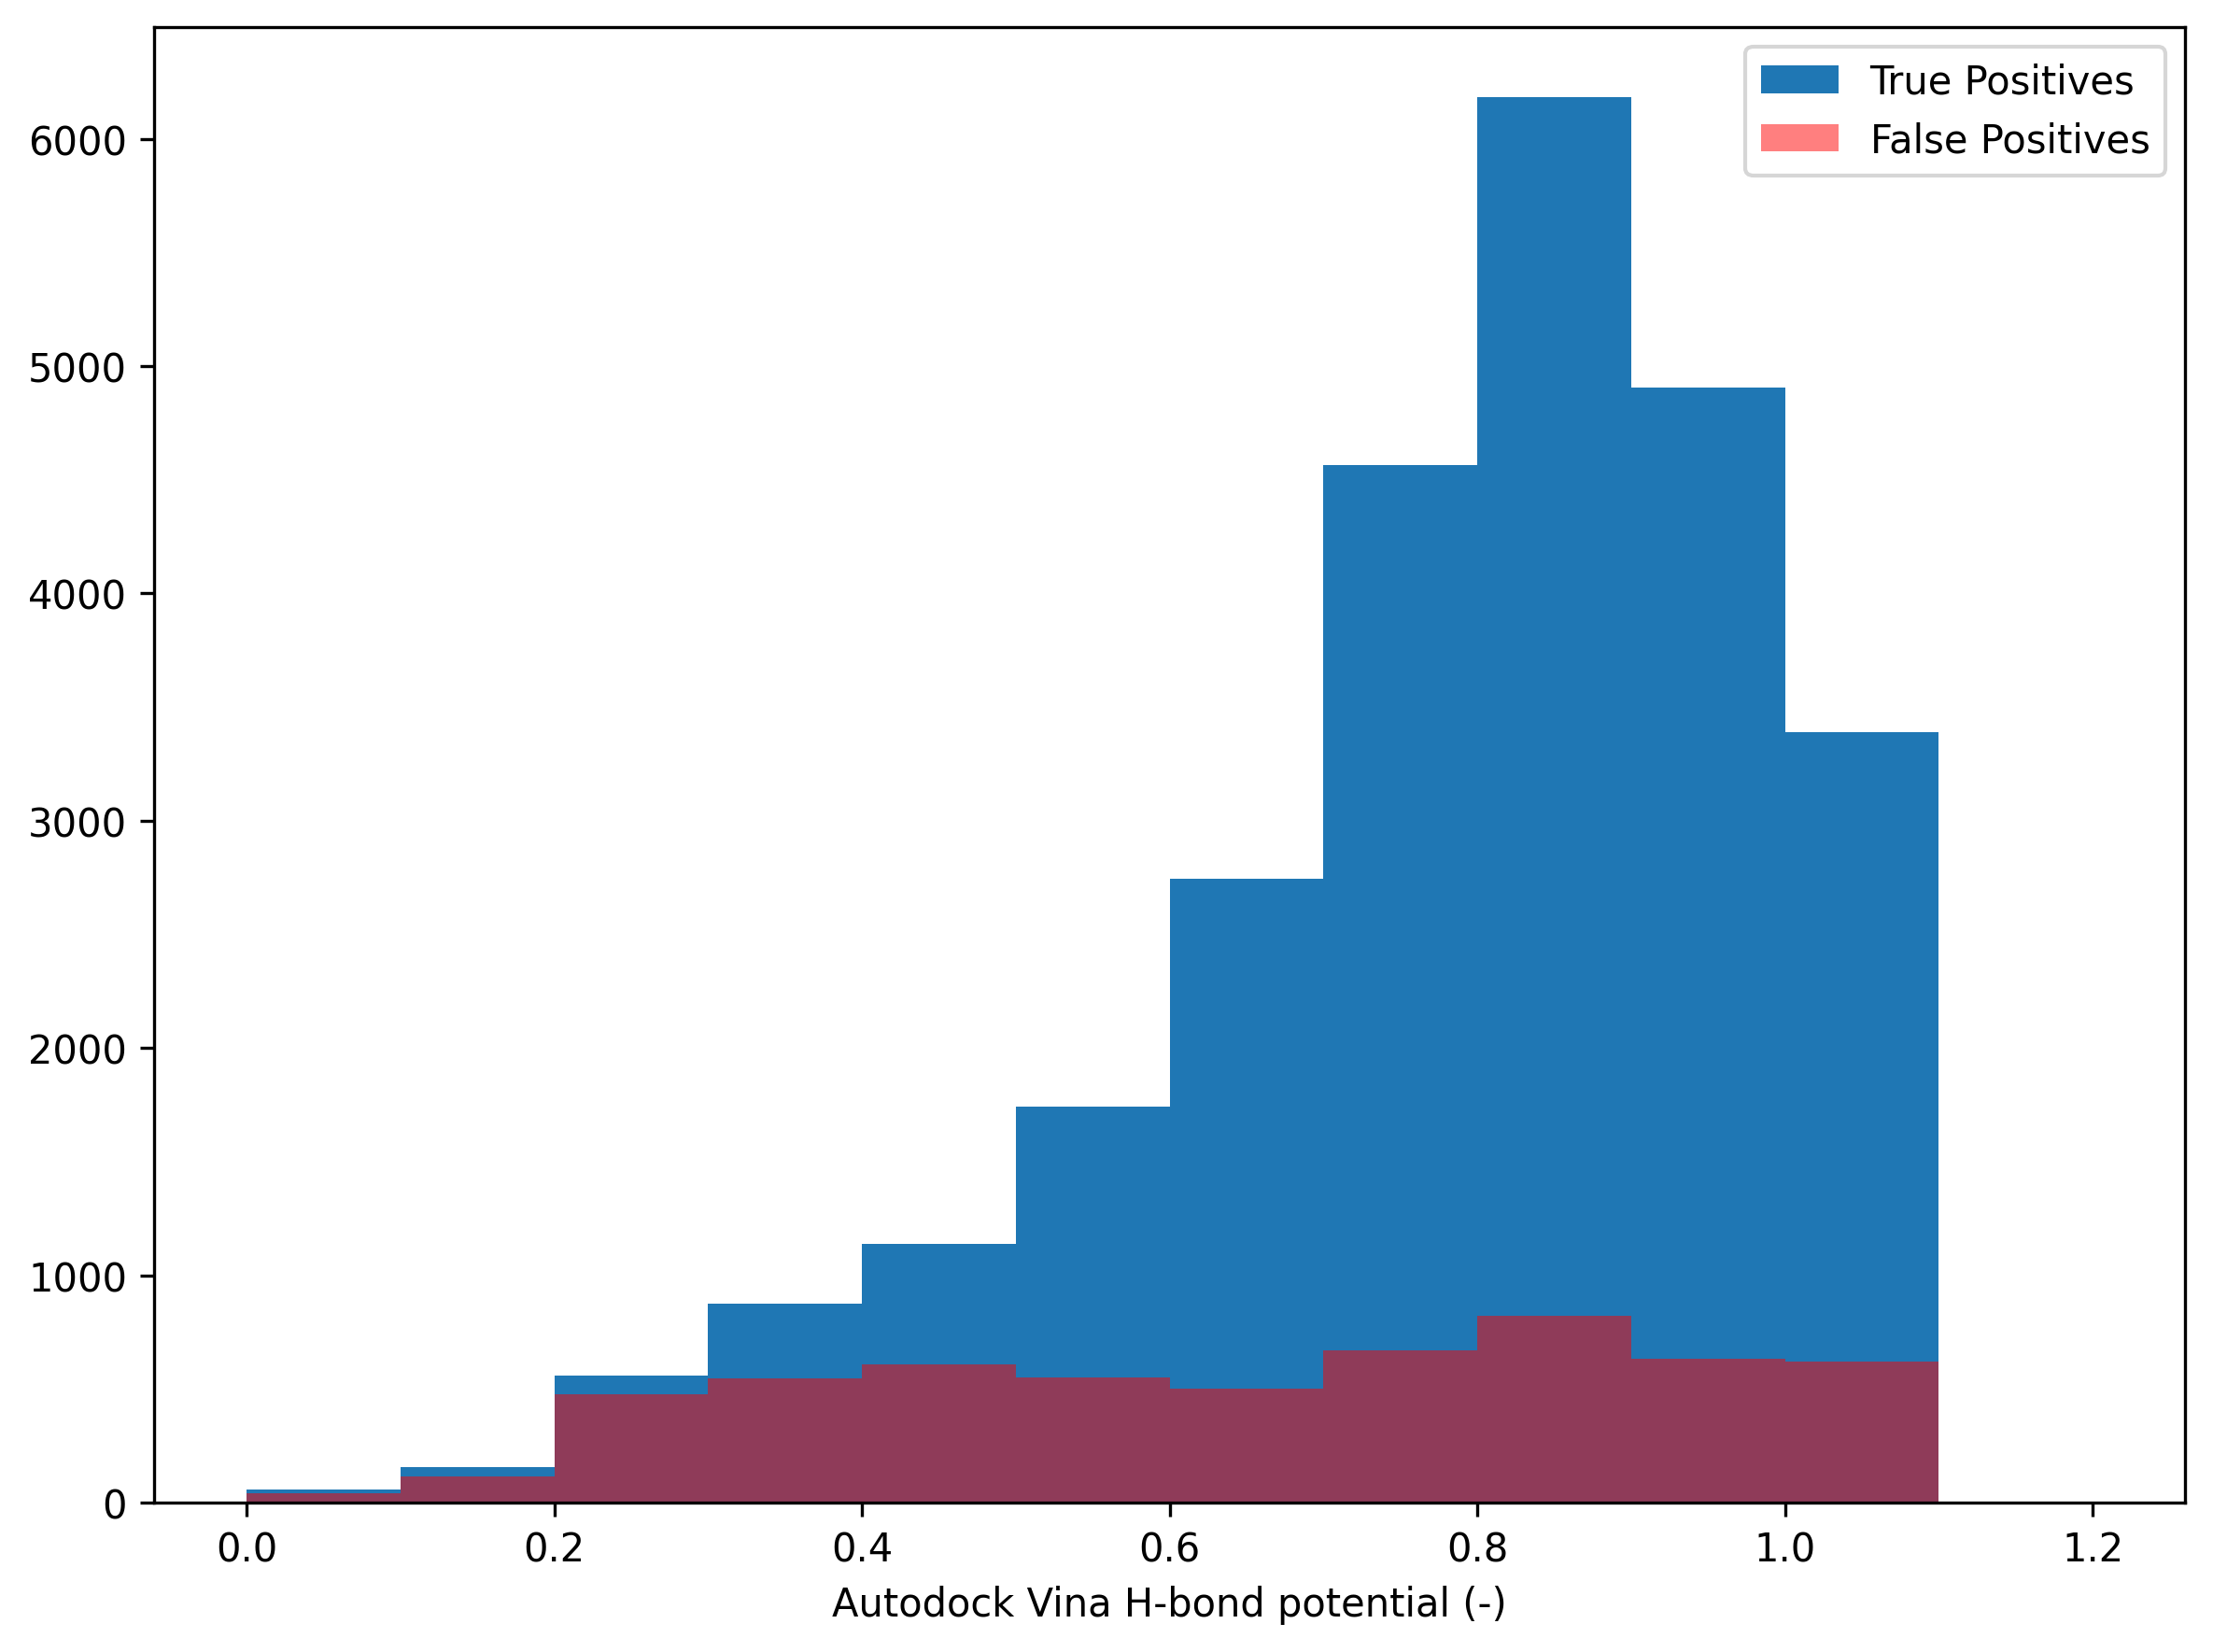

In [13]:
import matplotlib.pyplot as plt
import numpy as np
from mpl_toolkits.axes_grid1 import make_axes_locatable

fig, ax = plt.subplots(1, 1, dpi=300, figsize=(8, 6))

# now determine nice limits by hand:
binwidth = 0.1
xymax = max(
    np.max(np.abs(all_vhp_list)),
    np.max(np.abs(all_fp_vhp_list)),
)
lim = (int(xymax / binwidth) + 1) * binwidth

bins = np.arange(0, lim + binwidth, binwidth)
ax.hist(all_vhp_list, bins=bins)
ax.hist(all_fp_vhp_list, bins=bins, alpha=0.5, color="red")

ax.set_xlabel("Autodock Vina H-bond potential (-)")
fig.tight_layout()
ax.legend(["True Positives", "False Positives"])
fig.show()

In [14]:
idx = 3  # Example index to test

print(test_set.iloc[df_index_map[idx]])  # noqa: T201

pinder_system_id = test_set.iloc[df_index_map[idx]]["id"]
# receptor = test_local_paths[pinder_system_id]["holo_receptor"]
# receptor = (
#     receptor.parent.parent
#     / f"protonated_{receptor.parent.stem}"
#     / f"{receptor.stem}_protonated.pdb"
# )
# ligand = test_local_paths[pinder_system_id]["holo_ligand"]
# ligand = (
#     ligand.parent.parent
#     / f"protonated_{ligand.parent.stem}"
#     / f"{ligand.stem}_protonated.pdb"
# )
pdbs_dir = (
    test_local_paths[pinder_system_id]["holo_receptor"].parent.parent
    / "protonated_pdbs"
)
complex_path = pdbs_dir / f"{pinder_system_id}_protonated.pdb"

split                                            test
id                   8iyi__A1_Q6CVU4--8iyi__B1_Q6CVU4
pdb_id                                           8iyi
cluster_id                            cluster_142_142
cluster_id_R                              cluster_142
cluster_id_L                              cluster_142
pinder_s                                        False
pinder_xl                                        True
pinder_af2                                      False
uniprot_R                                      Q6CVU4
uniprot_L                                      Q6CVU4
holo_R_pdb                      8iyi__A1_Q6CVU4-R.pdb
holo_L_pdb                      8iyi__B1_Q6CVU4-L.pdb
predicted_R_pdb                        af__Q6CVU4.pdb
predicted_L_pdb                        af__Q6CVU4.pdb
apo_R_pdb                                            
apo_L_pdb                                            
apo_R_pdbs                                           
apo_L_pdbs                  

In [15]:
dfs[idx], dfs_i[idx]

(Frame                          0
 ligand   protein  interaction   
 GLY24.L  ARG30.R  HBAcceptor   1
 GLN25.L  TYR53.R  HBAcceptor   1
 ALA26.L  THR28.R  HBDonor      1
                   HBAcceptor   1
 THR28.L  ALA26.R  HBDonor      2
                   HBAcceptor   1
 ARG30.L  GLY24.R  HBDonor      1
 TYR53.L  GLN25.R  HBDonor      1
 ARG68.L  TRP205.R HBDonor      1
 TRP205.L ARG68.R  HBAcceptor   1
          THR231.R HBDonor      1
 THR231.L TRP205.R HBAcceptor   1
          GLN239.R HBAcceptor   1
 GLN239.L THR231.R HBDonor      1
 ARG270.L TRP286.R HBAcceptor   1
 TYR271.L THR285.R HBAcceptor   2
 ASN273.L THR285.R HBDonor      1
 THR285.L TYR271.R HBDonor      2
          ASN273.R HBAcceptor   1
 TRP286.L ARG270.R HBDonor      1,
 Frame                                 0
 ligand   protein  interaction          
 GLY24.L  ARG30.R  ImplicitHBAcceptor  1
 GLN25.L  TYR53.R  ImplicitHBAcceptor  1
 ALA26.L  THR28.R  ImplicitHBDonor     1
                   ImplicitHBAcceptor  1
 THR2

In [16]:
print("Tanimoto coefficient:", tm_coefs[idx])  # noqa: T201
print("Positive Predictive Values:", ppvs[idx])  # noqa: T201
print("Sensitivities:", sensitivities[idx])  # noqa: T201

Tanimoto coefficient: 0.6818181818181818
Positive Predictive Values: 0.8823529411764706
Sensitivities: 0.75


In [17]:
from prolif import Molecule
from prolif.io.protein_helper import ProteinHelper
from rdkit import Chem
from utils.molecule_helper import split_molecule

protein_helper = ProteinHelper()

complex_mol = Molecule.from_rdkit(
    Chem.MolFromPDBFile(
        complex_path,
        sanitize=False,
        removeHs=False,
        proximityBonding=True,
    )
)
ligand_mol, receptor_mol = split_molecule(complex_mol, lambda x: x.chain == "L")
ligand_mol, _ = split_molecule(ligand_mol, lambda x: x.chain == "L")
ligand_mol = protein_helper.standardize_protein(ligand_mol)
receptor_mol, _ = split_molecule(receptor_mol, lambda x: x.chain == "R")
receptor_mol = protein_helper.standardize_protein(receptor_mol)

ligand_mol_i = protein_helper.standardize_protein(
    Molecule.from_rdkit(Chem.RemoveAllHs(ligand_mol, sanitize=False))
)
receptor_mol_i = protein_helper.standardize_protein(
    Molecule.from_rdkit(Chem.RemoveAllHs(receptor_mol, sanitize=False))
)

In [19]:
# create Complex3D objects (default)
comp3D = fps[idx].plot_3d(ligand_mol, receptor_mol, frame=0)
other_comp3D = fps_i[idx].plot_3d(ligand_mol_i, receptor_mol_i, frame=0)


# compare the two Complex3D objects
view = comp3D.compare(other_comp3D, display_all=True, remove_hydrogens=False)
view

3Dmol.js failed to load for some reason. Please check your browser console for error messages.